    1. Kullanılacak paketler çağırılacak.
    2. Veri seti tanımlanacak.
    3. Regresyon modeli kurulacak ve mevcut veriye uyduralacak.
    4. Sonuçlar değerlendirilecek ve tahmin gerçekleştirilecek.

In [137]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score # r2_score --> determinasyon katsayısı

### r2_score ---> Hangi oranda başarılı? (Yüzde kaç başarılı?)

problem : Satış reklam harcamalarından etkileniyor mu?

In [138]:
satislar = np.array([22, 21, 23, 26, 30, 31, 32]) # Bağımlı değişken. (y)
reklam_giderler = np.array([7, 11, 15, 22, 26, 28, 31]) # Bağımsız değişken. (x)

In [139]:
df = pd.DataFrame({'satislar':satislar, 'reklam_giderler':reklam_giderler})

In [140]:
df.head()

,satislar,reklam_giderler
0,22,7
1,21,11
2,23,15
3,26,22
4,30,26


In [141]:
df.index = ['2000', '2001', '2002', '2003', '2004', '2005', '2006']

In [142]:
yillar = [str(x+2000) for x in range (7)]

In [143]:
df.index = yillar

In [144]:
df.head()

,satislar,reklam_giderler
2000,22,7
2001,21,11
2002,23,15
2003,26,22
2004,30,26


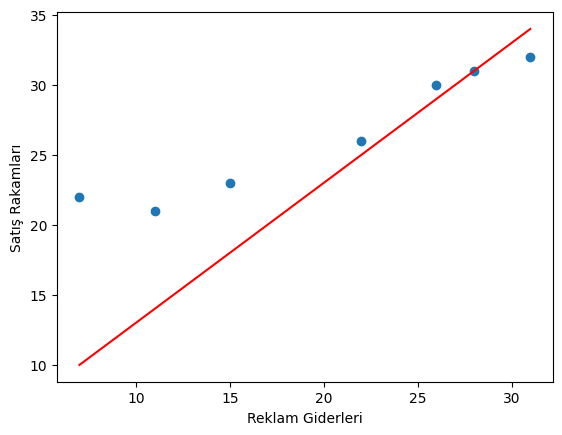

In [145]:
plt.scatter(x = reklam_giderler, y = satislar) # Aralarındaki ilişki grafiği.
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Rakamları')

# Sadece üstteki çalıştırıldığında regresyon çizgisi bulunmaz. Bunun için 'β0' ve 'β1' değerlerine ihtiyaç vardır.
plt.plot(reklam_giderler, reklam_giderler*1 + 3, color='red')

LinearRegression(
    
    fit_intercept = True ---> βo olacak mı olmayacak mı? (y = mx)

    normalize = False ---> Direkt normalize etmek.

    copy_X = True 

    n_jobs = None 
)

Önemli Fonksiyonlar

1. fit()
2. transform()
3. fit_transform()

In [146]:
lineer_model = LinearRegression()

### İlk adımda çalıştırıldığında 2D isteniyordu 1D yazıldı hatası geldi aşağıda bu hata düzeltilecek.

In [147]:
reklam_giderler # Tek boyutlu dizi.(1D)

array([ 7, 11, 15, 22, 26, 28, 31])

In [148]:
# (satır sayısı,sütun) ---> satır sayısı önemli değil bu yüzden -1 ama sütun sayısı 1 olmalı.
reklam_giderler = reklam_giderler.reshape(-1,1) # İki boyutlu dizi.(2D)
reklam_giderler

array([[ 7],
       [11],
       [15],
       [22],
       [26],
       [28],
       [31]])

### Yukarıda bu dönüşüm sağlandı.

In [149]:
# Bunun 2 boyutlu yani sütunlu değer istemesinin sebebi tablo görünümü istemesidir.
lineer_model.fit(X=reklam_giderler, y=satislar)

LinearRegression()

In [150]:
lineer_model.coef_ # Katsayılar.(β1,β2,β3...) (β0 buna dahil değil çünkü kesme noktasıdır.)

array([0.484])

In [151]:
lineer_model.intercept_ # β0'dır.

16.74857142857143

In [152]:
print("beta_0 = {}, beta_1 = {}".format(lineer_model.intercept_,
                                        lineer_model.coef_[0]))

beta_0 = 16.74857142857143, beta_1 = 0.48399999999999993


In [153]:
lineer_model.score(X=reklam_giderler, y=satislar)

0.9317000000000001

### Hazırlanan model %86 oranında verileri ortaya çıkartıyor. (Öğrenmesine yorum yapılabilir.)

## Tahmin

In [154]:
# Tahmin değerler.
satislar_tahmin = lineer_model.predict(reklam_giderler)

In [155]:
# Gerçek değerler.
satislar

array([22, 21, 23, 26, 30, 31, 32])

## Farklar

In [156]:
# Doğru ortadan geçtiği için hataların toplamı 0 olur. 
hatalar = satislar - satislar_tahmin
hatalar

array([ 1.86342857, -1.07257143, -1.00857143, -1.39657143,  0.66742857,
        0.69942857,  0.24742857])

In [157]:
hatalar.sum()

0.0

### Determinasyon katsayısı

In [158]:
hatalarin_karesi = np.square(hatalar)
hatalarin_karesi
# hatalarin_karesi = hatalar**2

array([3.47236604, 1.15040947, 1.01721633, 1.95041176, 0.4454609 ,
       0.48920033, 0.0612209 ])

In [159]:
# r_2 ---> R kare
r_2 = 1-((hatalarin_karesi).sum()/
         ((satislar-satislar.mean())**2).sum()).sum()

In [160]:
r_2

0.9317000000000001

### Gerçek ve Tahmin verilerinin görselleştirilmesi

Text(0.5, 1.0, 'Satış ve Reklam İlişkisi')

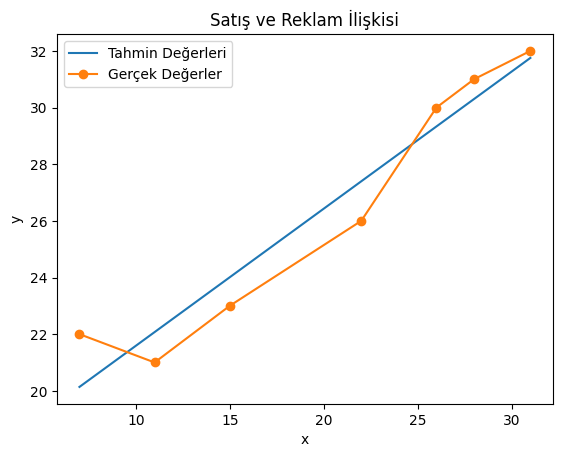

In [161]:
plt.plot(reklam_giderler, satislar_tahmin, label='Tahmin Değerleri')
plt.plot(reklam_giderler, satislar, label='Gerçek Değerler', marker='o')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Satış ve Reklam İlişkisi')

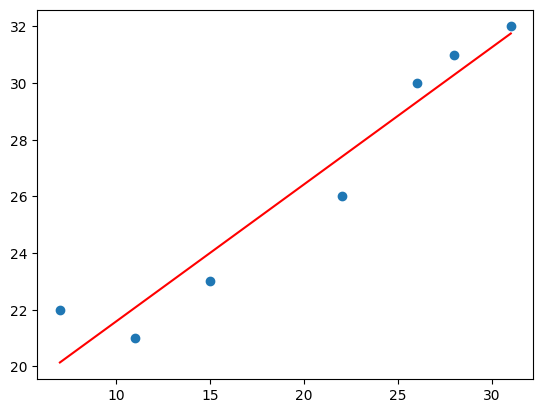

In [162]:
plt.scatter(x = reklam_giderler, y = satislar) # Aralarındaki ilişki grafiği.
plt.plot(reklam_giderler, 
         reklam_giderler * 
         lineer_model.coef_[0] + 
         lineer_model.intercept_, color='red') 

Mavilerin tüm uzaklıkları toplandığında toplamları 0'dır.